# Reading the data

In [16]:
import pandas as pd 

# Reading the csv file 
df = pd.read_csv("bank-full.csv", sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [17]:
df["y"].value_counts(normalize=True)

y
no     0.883015
yes    0.116985
Name: proportion, dtype: float64

# Defining input and target

In [18]:
X = df.drop(columns=["y"], axis=1)
y = df["y"].map({"no":0, "yes":1})

# Processing the input variables

In [19]:
from sklearn.preprocessing import OrdinalEncoder

# Encoding categorical features
cat_cols = X.select_dtypes(include="object").columns

# Defining the encoder
ord_encoder = OrdinalEncoder()
X[cat_cols] = ord_encoder.fit_transform(X[cat_cols])
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4.0,1.0,2.0,0.0,2143,1.0,0.0,2.0,5,8.0,261,1,-1,0,3.0
1,44,9.0,2.0,1.0,0.0,29,1.0,0.0,2.0,5,8.0,151,1,-1,0,3.0
2,33,2.0,1.0,1.0,0.0,2,1.0,1.0,2.0,5,8.0,76,1,-1,0,3.0
3,47,1.0,1.0,3.0,0.0,1506,1.0,0.0,2.0,5,8.0,92,1,-1,0,3.0
4,33,11.0,2.0,3.0,0.0,1,0.0,0.0,2.0,5,8.0,198,1,-1,0,3.0


# Build the Decision Tree

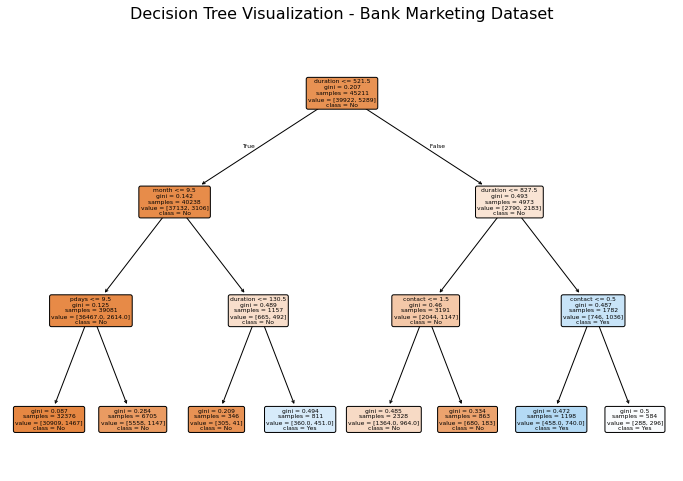

In [20]:
from sklearn.tree import DecisionTreeClassifier

# Defining the model
dt_md = DecisionTreeClassifier(max_depth=3, random_state=42)

# Fitting the model
dt_md.fit(X, y)

# Visualizing the tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plot_tree(dt_md, 
          feature_names=X.columns, 
          class_names=["No", "Yes"], 
          filled=True,                # Color nodes to indicate majority class
          rounded=True)
plt.title("Decision Tree Visualization - Bank Marketing Dataset", fontsize=16, pad=20)
plt.show();

# Running 5-fold cross-validation

In [21]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Defining the model 
dt_md = DecisionTreeClassifier(random_state=42)

# Defining the cross-validation method
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluating the model using cross-validation
dt_cv = cross_val_score(dt_md, X, y, cv=skf, scoring='roc_auc', n_jobs=-1)

print(f"Decision Tree Classifier AUC-ROC: {dt_cv.mean():.4f} ± {dt_cv.std():.4f}")

Decision Tree Classifier AUC-ROC: 0.6995 ± 0.0086


In [22]:
# Defining the model 
dt_md = DecisionTreeClassifier(max_depth=3,random_state=42)

# Evaluating the model using cross-validation
dt_cv = cross_val_score(dt_md, X, y, cv=skf, scoring='roc_auc', n_jobs=-1)

print(f"Decision Tree Classifier AUC-ROC: {dt_cv.mean():.4f} ± {dt_cv.std():.4f}")

Decision Tree Classifier AUC-ROC: 0.7862 ± 0.0128


In [23]:
# Defining the model 
dt_md = DecisionTreeClassifier(max_depth=5,random_state=42)

# Evaluating the model using cross-validation
dt_cv = cross_val_score(dt_md, X, y, cv=skf, scoring='roc_auc', n_jobs=-1)

print(f"Decision Tree Classifier AUC-ROC: {dt_cv.mean():.4f} ± {dt_cv.std():.4f}")

Decision Tree Classifier AUC-ROC: 0.8472 ± 0.0071


In [24]:
# Defining the model 
dt_md = DecisionTreeClassifier(max_depth=7,random_state=42)

# Evaluating the model using cross-validation
dt_cv = cross_val_score(dt_md, X, y, cv=skf, scoring='roc_auc', n_jobs=-1)

print(f"Decision Tree Classifier AUC-ROC: {dt_cv.mean():.4f} ± {dt_cv.std():.4f}")

Decision Tree Classifier AUC-ROC: 0.8738 ± 0.0039
